## Predicting Car Prices Based on Certain Characteristics
Group 36: Henry Zhang, Moira Renata, Ning Wang, Paige Wills, Xinrui Wang

## **Introduction**

Over the past few decades, we have seen a rapid increase in demand for the car industry. The high market price of both brand new and used cars have created a large economic impact all over the world. Based on previous studies, it was found that there are multiple factors affecting  the final price of a car (Balce, 2016) and that while most factors do have a positive contribution or effect to the final price, there are still some factors that create a negative effect (Erdem and Senturk, 2009). 

Therefore, in this project, we hope to create a model that allows us to predict the final price of a car given its characteristics.

## **Description**

The sample we use is from the The Automobile Data Set that was created by Jeffrey C. Schlimmer in 1985. The author created a data set that consists of 26 columns with 205 rows, where each row refers to one car sample. Out of the 25 columns predictor variables, there are 9  categorical variables and 16 numerical variables. Our response variable is the 26th column, which represents the price of a car in USD($). 

Variable|Type|Description|
|-|-|-|
|symboling|Categorical|Assigned insurance risk rating|
|normalized-losses|Numerical|Relative average loss payment per insured vehicle year in dollars (USD)|
|make|Categorical|Car manufacturer/model|
|fuel-type|Categorical|Type of fuel to power car|
|aspiration|Categorical|Engine aspiration (std, turbo)|
|num-of-doors|Numerical|Number of doors|
|body-style|Categorical|Car's style (sedan, convertible, etc.)|
|drive-wheels|Categorical|amount and location of wheels|
|engine-location|Categorical|Engine location (front, back)|
|wheel-base|Numerical|Horizontal distance between the front and rear wheel in inches.|
|length|Numerical|Length of car in inches|
|width|Numerical|Width of car in inches|
|height|Numerical|Height of car in inches|
|curb-weight|Numerical|Weight of car in pounds|
|engine-type|Categorical|Engine type (dohc, dohcv, etc.)|
|num-of-cylinders|Categorical|Number of cylinders in engine|
|Engine-size|Numerical|Engine size in cubic inches|
|fuel-system|Categorical|Fuel system in car (1bbl, mfi. etc.)|
|bore|Numerical|Diameter of each cylinder in inches|
|stroke|Numerical|Movement of piston in gigapascal|
|compression-ratio|Numerical|Ratio between the cylinder's highest and lowest volumes at the bottom and top of the piston's stroke. |
|horsepower|Numerical|Engine horsepower (hp)|
|peak-rpm|Numerical|RPM at which engine delivers peak horsepower|
|city-mpg|Numerical|Mileage in the city in miles per gallon|
|highway-mpg|Numerical|Mileage in the highway in miles per gallon|
|price|Numerical|Price of car in USD ($)|


## **Preliminary Analysis**

In [1]:
library(tidyverse)
library(leaps)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# Labelling all the columns
names<-c("symboling","normalized-losses","make","fuel-type","aspiration",
         "num-of-doors","body-style","drive-wheels","engine-location",
        "wheel-base","length","width","height","curb-weight","engine-type",
        "num-of-cylinders","engine-size","fuel-system","bore","stroke",
        "compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price")

# Reading the data from the web 
df<-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
            col_names=names,col_types = cols(
                symboling = col_factor(),
                `normalized-losses`= col_double(),
                make = col_factor(),
                `fuel-type`= col_factor(),
                aspiration = col_factor(),
                `num-of-doors`= col_factor(),
                `body-style` = col_factor(),
                `drive-wheels` = col_factor(),
                `engine-location` = col_factor(),
                `wheel-base` = col_double(),
                length = col_double(),
                width = col_double(),
                `curb-weight` = col_double(),
                `engine-type` = col_factor(),
                `num-of-cylinders` = col_factor(),
                `engine-size` = col_double(),
                `fuel-system` = col_factor(),
                bore = col_double(),
                stroke = col_double(),
                `compression-ratio` = col_double(),
                horsepower = col_double(),
                `peak-rpm` = col_double(),
                `city-mpg` = col_double(),
                `highway-mpg` = col_double(),
                price = col_double()
                 ))%>%replace("?",NA)
head(df)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,⋯,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,?
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,NA
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,NA
1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,NA
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,NA
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,NA
2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,NA


From the dataframe above, we notice that there are some NA values, annd that the last column `?` can be removed as it does not represent anything. Other than that, each row represents an observation, each column is a variable, and each cell is a value, which means there is not a lot of data tidying to do. 

In [3]:
# Checking the summary of results of each column
summary(df)

 symboling normalized-losses         make      fuel-type   aspiration 
 3 :27     Min.   : 65       toyota    : 32   gas   :185   std  :168  
 1 :54     1st Qu.: 94       nissan    : 18   diesel: 20   turbo: 37  
 2 :32     Median :115       mazda     : 17                           
 0 :67     Mean   :122       honda     : 13                           
 -1:22     3rd Qu.:150       mitsubishi: 13                           
 -2: 3     Max.   :256       subaru    : 12                           
           NA's   :41        (Other)   :100                           
 num-of-doors       body-style drive-wheels engine-location   wheel-base    
 two : 89     convertible: 6   rwd: 76      front:202       Min.   : 86.60  
 four:114     hatchback  :70   fwd:120      rear :  3       1st Qu.: 94.50  
 ?   :  2     sedan      :96   4wd:  9                      Median : 97.00  
              wagon      :25                                Mean   : 98.76  
              hardtop    : 8                   

Based on the above summary statistics, we notice that there are some variables that contain NA values, and that the last column does not contain data. 

In [4]:
#Remove the last column
automobile<-df[,-27]
#Check that the last column is now the response variable
colnames(automobile[,26])
#number of rows in the dataframe
nrow(automobile)
#number of rows in the dataframe after NAs are removed
nrow(na.omit(automobile))

[1] "price"

[1] 205

[1] 160

From above, we can see that there are 45 rows that contain NA values

In [5]:
#print out the R^2 (coefficient of determination) of all the variables
r_sqr<-c()
for (x in 1:25){
     r_sqr<-c(r_sqr,summary(lm(unlist(automobile[,26])~unlist(automobile[,x])))$r.squared)

 }
r_sqr

[1] 0.149362866 0.041312258 0.795865804 0.012171730 0.032248431 0.004154080
 [7] 0.157043658 0.407022524 0.109601960 0.341806060 0.476967560 0.564399617
[13] 0.018356540 0.696247601 0.201557756 0.629531969 0.760968644 0.352720656
[19] 0.295322541 0.006774908 0.005056252 0.656963877 0.010332492 0.471379747
[25] 0.496591188

In [6]:
names<-colnames(automobile[,-26])
#create a summary table of the predictor variables with the top 8 highest R^2 values
df_sqr<-cbind(r_sqr,names)%>%as.data.frame()
df_sqr$r_sqr<-as.numeric(df_sqr$r_sqr)
head(df_sqr%>%arrange(desc(df_sqr$r_sqr)),8)

,r_sqr,names
,<dbl>,<chr>
1,0.7958658,make
2,0.7609686,engine-size
3,0.6962476,curb-weight
4,0.6569639,horsepower
5,0.6295320,num-of-cylinders
6,0.5643996,width
7,0.4965912,highway-mpg
8,0.4769676,length


Based on the summary table, the variable that has the highest R^2 value is `make` with a value of 0.796. This can be interpreted as 79.6% of the variation observed in `price` is explained by the model with `make` as the explanatory variable. 


In [7]:
#a list of the top  8 variables with the highest coefficient of determination
nms <-head(df_sqr%>%arrange(desc(df_sqr$r_sqr)),8)%>%select(names)%>%pull()
nms

[1] "make"             "engine-size"      "curb-weight"      "horsepower"      
[5] "num-of-cylinders" "width"            "highway-mpg"      "length"

Warning message:
“Ignoring unknown parameters: bins”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



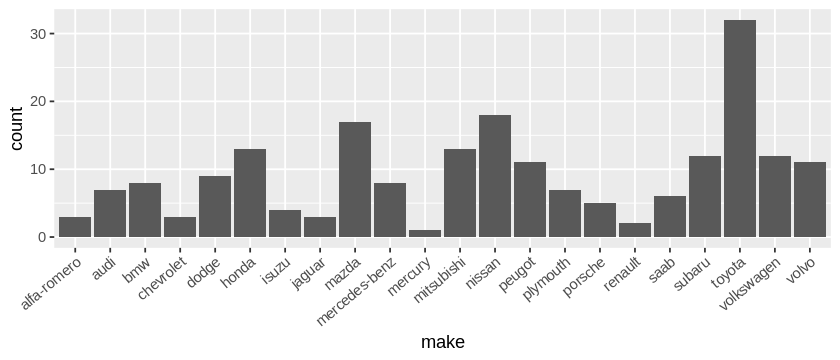

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”


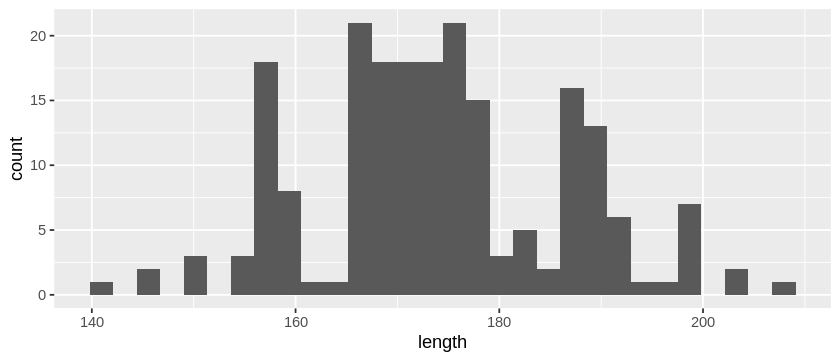

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



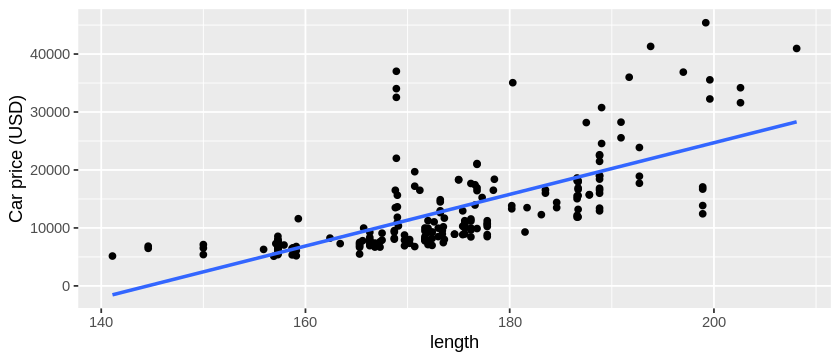

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”


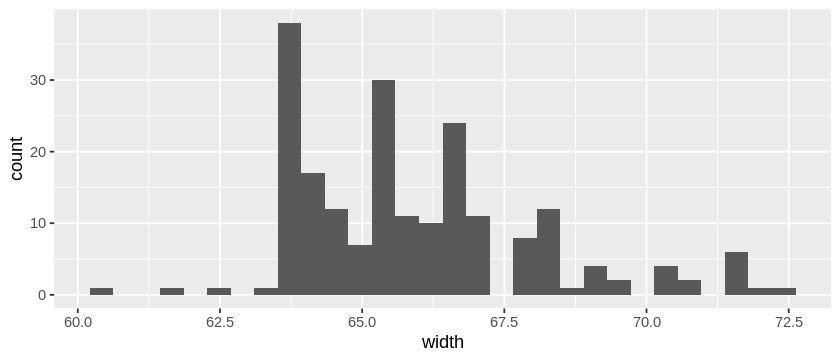

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



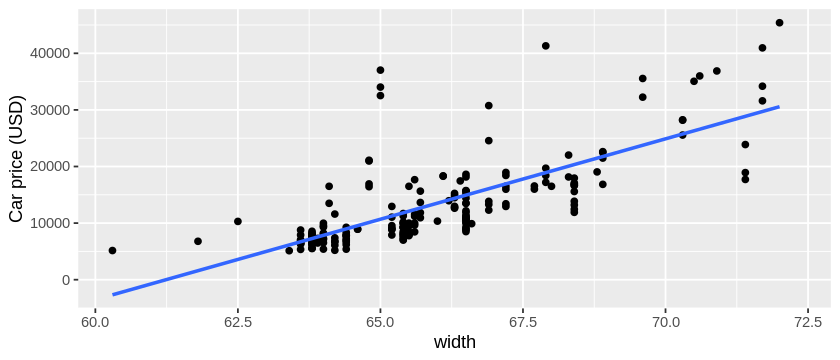

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Ignoring unknown parameters: bins”


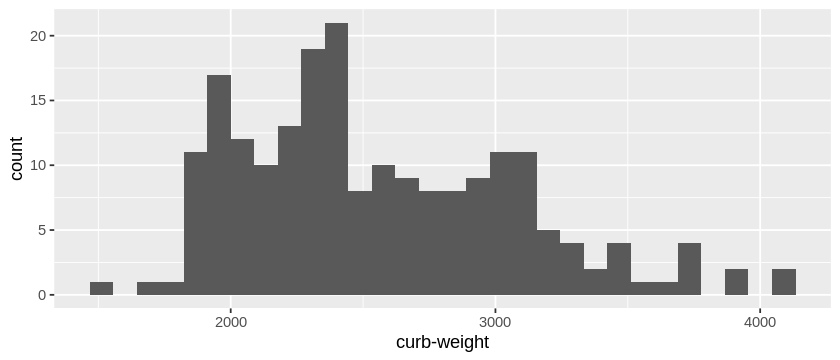

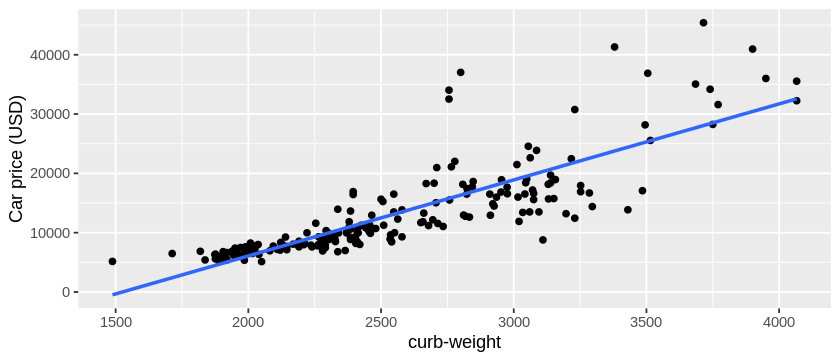

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



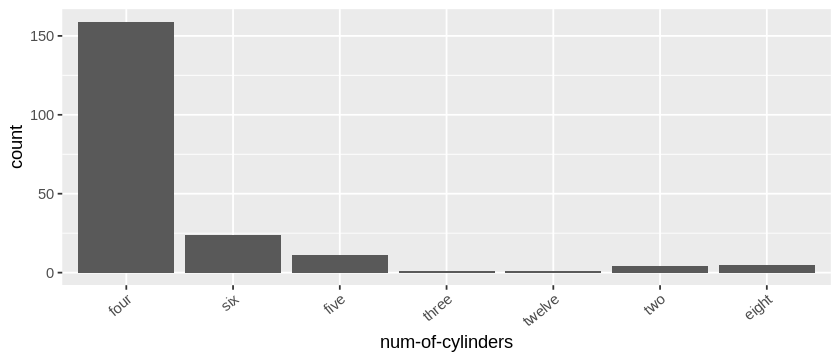

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”


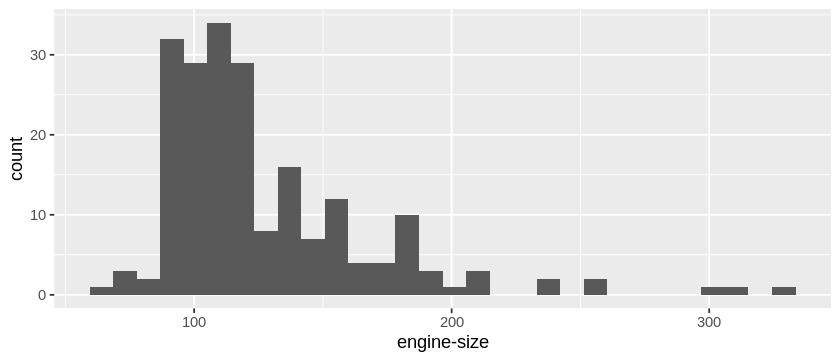

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”


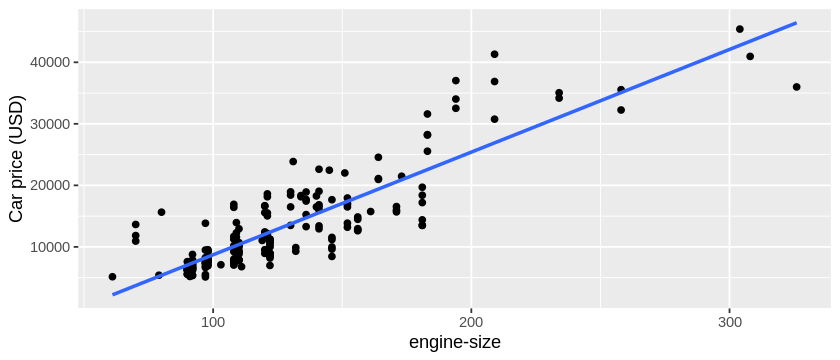

Warning message:
“Removed 6 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”


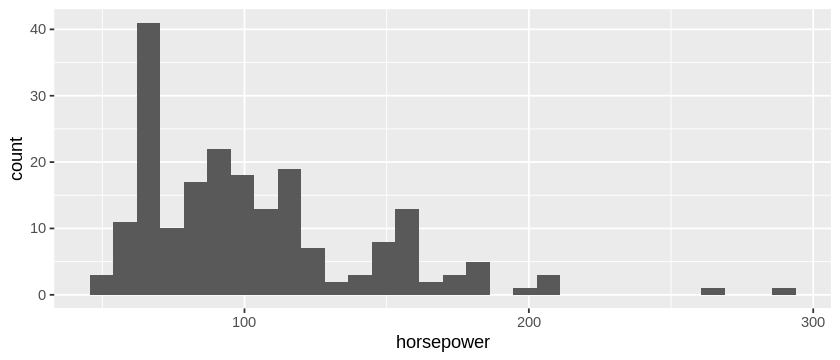

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



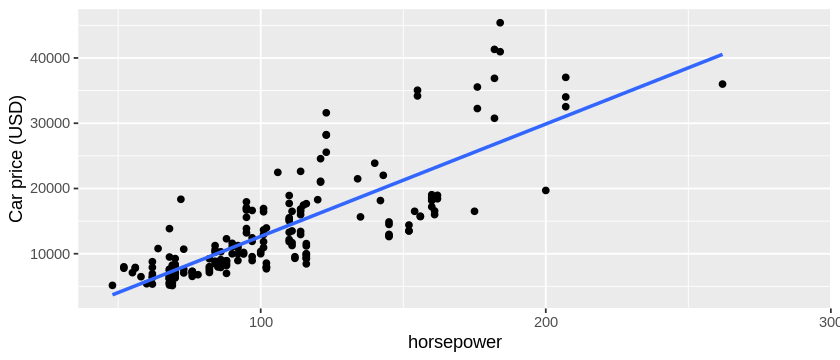

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”


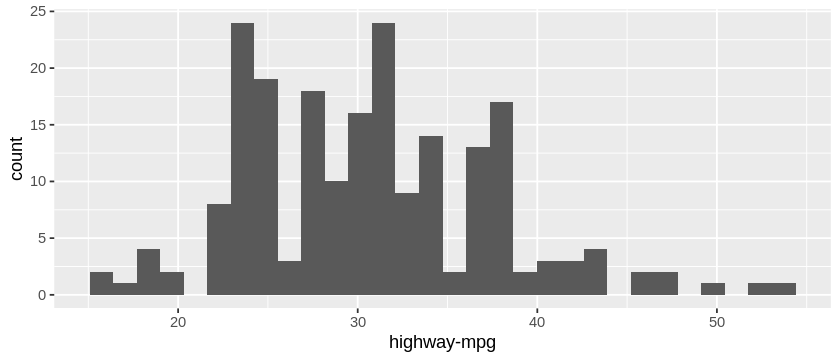

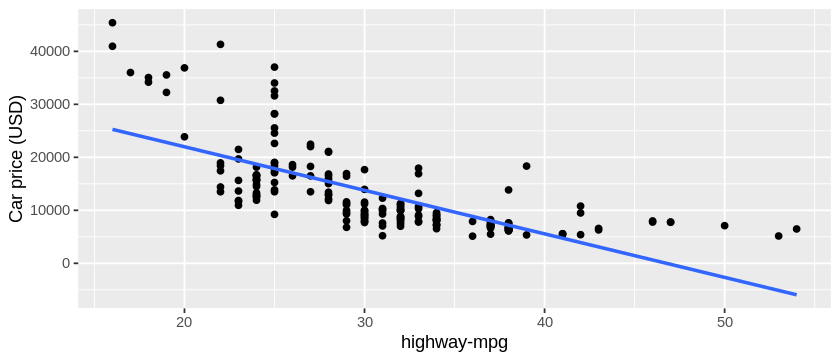

In [8]:
options(repr.plot.height = 3, repr.plot.width = 7)
for (x in 1:25){
    if (colnames(automobile[,x]) %in% nms){
    
    if (typeof(unlist(automobile[,x]))=="double"){
         print(automobile %>%
         ggplot() +
         geom_histogram(aes(x = unlist(automobile[,x])))+
              xlab(colnames(automobile[,x])))
        
         print(automobile %>% 
         ggplot(aes(x = unlist(automobile[,x]),y=unlist(automobile[,26]))) +
         geom_point()+
         geom_smooth(method=lm,formula=y~x,se=FALSE)+
              xlab(colnames(automobile[,x]))+
              ylab("Car price (USD)"))}
        
    else{
        print(automobile %>%
            ggplot(aes(x=unlist(automobile[,x]))) +
            geom_bar(stat="count",bins=50)+
            xlab(colnames(automobile[,x])) +
            theme(axis.text.x = element_text(angle = 40, hjust = 1)))
    
    }

}
      
    
    }

Here, we created plots for the top 8 predictor variables. For the numerical variables, we created both a histogram to see the distribution, and a scatterplot to see the relationship between the variable and the car price. For the categorical variables, we created a bar graph to compare the count of each category in a variable. Then, we performed analysis on the plots above: 

- For the variable `make`, we can see that Japanese brands, such as Toyota, Nissan and Mazada have the top 3 counts, which means they produce the most cars. 
- For the variable `length`, we can see the distribution is approximately normal and has a positive linear relationship with `price`. 
- For the variable `width`, we can see the distribution is approximately normal and has a positive linear relationship with `price`. 
- For the variable `curb-weight`, we can see the distribution is skewed to right and has a positive linear relationship with `price`. 
- For the variable `num-of-cylinders`, we can see that most cars have 4-cyclinders.
- For the variable `engine-size`, we can see the distribution is skewed to right and has a positive linear relationship with `price`. 
- For the variable `horse-power`, we can see the distribution is skewed to right and has a positive linear relationship with `price`.
- For the variable `highway-mpg`, we can see the distribution is approximately normal and has a negative linear relationship with `price`. 

Our goal is to compare the results of different shrinkage methods (LASSO, Ridge) with the full model in order to explore the different models and estimation methods to ultimately compare their penalties in order to determine which model has the best predictive performance. Shrinkage methods use a penalty parameter - lambda, which is selected using a “tuning” process with k-folds cross-validation. This selects the value that yields the smallest test MSE. 

In [9]:
sapply(lapply(na.omit(automobile), unique), length)
## Since lm will automatically omit the Na in data and we notice if the NA is being removed
## the levels of engine-location which will cause contrasts can be applied only to 
## factors with 2 or more levels. Thus we need to remove engine-location


symboling normalized-losses              make         fuel-type 
                6                51                18                 2 
       aspiration      num-of-doors        body-style      drive-wheels 
                2                 3                 5                 3 
  engine-location        wheel-base            length             width 
                1                40                56                33 
           height       curb-weight       engine-type  num-of-cylinders 
               39               136                 5                 5 
      engine-size       fuel-system              bore            stroke 
               32                 6                33                31 
compression-ratio        horsepower          peak-rpm          city-mpg 
               29                48                20                25 
      highway-mpg             price 
               28               146

In [10]:
levels(automobile$`num-of-doors`)

[1] "two"  "four" "?"

First the data is prepared. The variable `num-of-doors` needs to be converted to characters and have “?”s removed. The variable `engine-location` is dropped because ??. Now the dataset is split into two data sets - training and testing using a 70-30% basis and the ID variables are removed.

In [11]:
set.seed(123)
drop <- "engine-location"
df_ats<-automobile[,!(names(automobile) %in% drop)]
### factor variable cannot be filtered
### change to charactor type and remove ? im num-of-doors
### then change back to factor type
df_ats$`num-of-doors`<-as.character(df_ats$`num-of-doors`)

df_at<-df_ats%>%filter(`num-of-doors`!='?')%>%na.omit()

df_at$`num-of-doors`<-as.factor(df_at$`num-of-doors`)

df_at$ID <- 1:nrow(df_at)
training_df_at <- sample_n(df_at, size = nrow(df_at) * 0.70,
  replace = FALSE
)

testing_df_at <- anti_join(df_at,
  training_df_at,
  by = "ID"
)

# I now remove the ID variable

training_df_at <- training_df_at[,-26]
testing_df_at <- testing_df_at [,-26]

A full model is created using `lm()` with price as our response variable and all input variables included (using training data). A stepwise model is created using forward selection because we have more predictor variables (p) than observations (n). There are more predictor variables because our data set contains categorical variables with many levels.

In [12]:
library(MASS)
full_mod<-lm(price ~.,data=training_df_at)
step_mod_fs <- stepAIC(full_mod, direction = "forward")
summary(step_mod_fs)
## the reason we only interpret the forward selection here is that we have p>n where
## p is numbers of predictors and n is that data size. This is because categorical variables have
## so many levels. Thus backward selection and step wise selection will not work in here.


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




Start:  AIC=1567.55
price ~ symboling + `normalized-losses` + make + `fuel-type` + 
    aspiration + `num-of-doors` + `body-style` + `drive-wheels` + 
    `wheel-base` + length + width + height + `curb-weight` + 
    `engine-type` + `num-of-cylinders` + `engine-size` + `fuel-system` + 
    bore + stroke + `compression-ratio` + horsepower + `peak-rpm` + 
    `city-mpg` + `highway-mpg`




Call:
lm(formula = price ~ symboling + `normalized-losses` + make + 
    `fuel-type` + aspiration + `num-of-doors` + `body-style` + 
    `drive-wheels` + `wheel-base` + length + width + height + 
    `curb-weight` + `engine-type` + `num-of-cylinders` + `engine-size` + 
    `fuel-system` + bore + stroke + `compression-ratio` + horsepower + 
    `peak-rpm` + `city-mpg` + `highway-mpg`, data = training_df_at)

Residuals:
     Min       1Q   Median       3Q      Max 
-2427.28  -447.45    -4.99   483.56  2278.43 

Coefficients: (4 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             5.309e+04  2.477e+04   2.144 0.036052 *  
symboling1             -1.962e+03  8.676e+02  -2.262 0.027288 *  
symboling2             -1.081e+03  8.196e+02  -1.319 0.192161    
symboling0             -7.670e+02  9.441e+02  -0.812 0.419740    
symboling-1            -4.600e+02  1.497e+03  -0.307 0.759739    
symboling-2            -4.559e+02

We created a summary table to see which variables had categorical variables with more than two levels, as these need to be removed in order to use shrinkage methods in our further analysis. The summary table also showed the mean and range of each predictor variable. 

In [13]:
summary(automobile)
### removing the the categorical variables with more than 2 levels for ridge and lasso
### "symboling","make","body-style","drive-wheels" have to be removed for ridge and lasso

 symboling normalized-losses         make      fuel-type   aspiration 
 3 :27     Min.   : 65       toyota    : 32   gas   :185   std  :168  
 1 :54     1st Qu.: 94       nissan    : 18   diesel: 20   turbo: 37  
 2 :32     Median :115       mazda     : 17                           
 0 :67     Mean   :122       honda     : 13                           
 -1:22     3rd Qu.:150       mitsubishi: 13                           
 -2: 3     Max.   :256       subaru    : 12                           
           NA's   :41        (Other)   :100                           
 num-of-doors       body-style drive-wheels engine-location   wheel-base    
 two : 89     convertible: 6   rwd: 76      front:202       Min.   : 86.60  
 four:114     hatchback  :70   fwd:120      rear :  3       1st Qu.: 94.50  
 ?   :  2     sedan      :96   4wd:  9                      Median : 97.00  
              wagon      :25                                Mean   : 98.76  
              hardtop    : 8                   

From the summary, the variables “symboling”, “make”, “body-style”, “drive-wheels”, “engine-type”, “num-of-cylinders” and “fuel-system” all were dropped because of their high levels. New sub-training and sub-testing datasets were created excluding the variables listed above.

In [14]:
drops <- c("symboling","make","body-style","drive-wheels","engine-type","num-of-cylinders","fuel-system")
training_df_sub<-training_df_at[,!(names(training_df_at) %in% drops)]
testing_df_sub<-testing_df_at[,!(names(testing_df_at) %in% drops)]

This code prepares the dataset(s) for `glment()` which only takes matrices (hence `model.matrix`). The `glmnet()` function has an argument `object` which is the formula of the model and therefore needs clear x and y variables, explaining why the training and testing datasets are split into subsets of x and y. 

In [15]:
library(glmnet)
x_train_mat<-model.matrix( ~ ., training_df_sub[,-18])
y_train_mat<-training_df_sub$price

x_test_mat<-model.matrix( ~ ., testing_df_sub[,-18])
y_test_mat<-testing_df_sub$price


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-2



Now our data is prepared for the `glmnet()` function, we will use `cv.glmnet` to obtain the optimal value of lambda using the training set (called `lasso_cv`). The argument `alpha=1` for LASSO) and `n.folds=10`. 


Call:  glmnet(x = x_train_mat, y = y_train_mat, alpha = 1, lambda = lasso_cv$lambda.min) 

  Df  %Dev Lambda
1 17 85.81  1.717


Call:  glmnet(x = x_train_mat, y = y_train_mat, alpha = 1, lambda = lasso_cv$lambda.1se) 

  Df  %Dev Lambda
1  3 76.57   1054

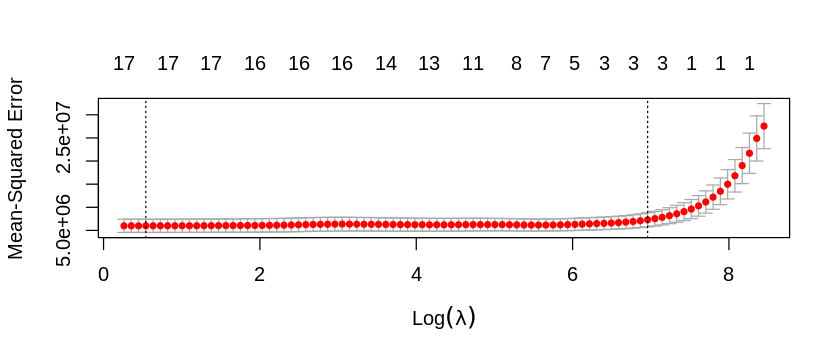

In [16]:
set.seed(123)
lasso_cv<-cv.glmnet(x=x_train_mat,y=y_train_mat,alpha=1,nfolds=10)
plot(lasso_cv)

lasso_mod<-glmnet(x=x_train_mat,y=y_train_mat,alpha=1,lambda=lasso_cv$lambda.min)
lasso_mod_1se<-glmnet(x=x_train_mat,y=y_train_mat,alpha=1,lambda=lasso_cv$lambda.1se)

lasso_mod
lasso_mod_1se

The plot shows the estimated testMSE on the y-axis for a grid of values of lambda on the x-axis (on a natural log-scale). The two vertical dotted lines show us where lambda is minimized, in other words, how many variables are needed for the best model. The numbers on the top x-axis indicate the number of inputs whose estimated coeff are different for 0 for different values of lambda. The error bars represent the variation across the different sets of teh CV (folds.  The left line shows lambdahat min - which is the minimum MSE in the grind and the right line represents lamdahat 1se - which is the largest values of lambda such that the corresponding MSE is still within 1 standard error of that of the minimum (more penalization at low cost). 

A similar method is followed for Ridge, except `alpha = 0`. 
`ridg_mod` provides the lambda hat min value for Ridge (explained above) and `ridg_mod_1se` provides the lambda hat 1se value for Ridge (explained above).



Call:  glmnet(x = x_train_mat, y = y_train_mat, alpha = 0, lambda = ridg_cv$lambda.min) 

  Df  %Dev Lambda
1 17 83.23   1450


Call:  glmnet(x = x_train_mat, y = y_train_mat, alpha = 0, lambda = ridg_cv$lambda.1se) 

  Df  %Dev Lambda
1 17 78.48   8490

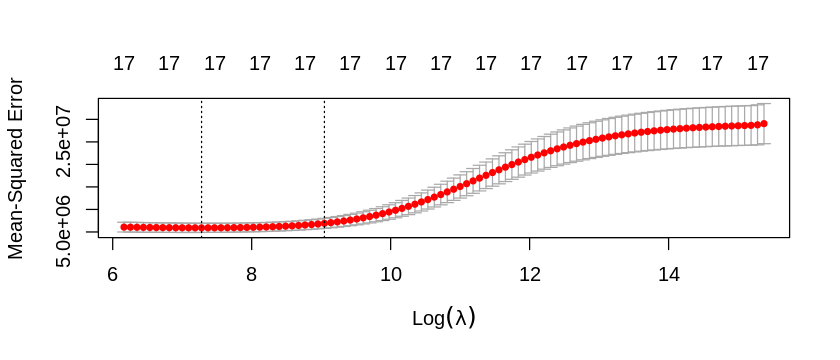

In [24]:
set.seed(123)
ridg_cv<-cv.glmnet(x=x_train_mat,y=y_train_mat,alpha=0,nfolds=10)
plot(ridg_cv)

ridg_mod<-glmnet(x=x_train_mat,y=y_train_mat,alpha=0,lambda=ridg_cv$lambda.min)
ridg_mod_1se<-glmnet(x=x_train_mat,y=y_train_mat,alpha=0,lambda=ridg_cv$lambda.1se)

ridg_mod
ridg_mod_1se

The plot for Ridge shows the estimated testMSE’s for each value of lambda, just like that of LASSO. However the main difference here is that the top x-axis is all the same value - 17. This is because the Ridge estimator never shrinks estimates to 0, unlike LASSO. The two vertical lines represent lambdahat min (left) and lamdahat 1se (right) with the x and y axis being the same as LASSO.


Now that we have selected a value for lambda (for LASSO and Ridge), we can fit a LASSO and Ridge regression with our selected lambda values. For explanatory analysis purposes, we will be using both lambdahat min and lambdahat 1se for both LASSO and Ridge - creating four different models. Additionally, we now be introducing our OLS model (introduced in the data preparation), giving us 5 models overall:
1. `mod_lasso`:  Lasso regression using lambda = lambdahat min
2. `mod_lasso_1se`: Lasso regression using lambda = lambdahat 1se
3. `ridg_mod`:  Lasso regression using lambda = lambdahat min
4. `ridg_mod_1se`: Lasso regression using lambda = lambdahat 1se
5. `ols_fs`: ordinary least squares full regression using lambda = 0

We can now obtain the out-of-sample predictions for the test sets of all five different models above, shown by `preds_1`, `preds_2`, `preds_3`, `preds_4` and `preds_5`.

Finally, we are able to compute the RMSE (root mean squared error) to evaluate the predicted models which is clearly summarised in a tibble

In [25]:
set.seed(123)
kfolds=10

fold_labels <- sample(rep(seq(kfolds), length.out = nrow(training_df_sub)))
errors <- matrix(NA,ncol=5,nrow=10)
  for (fold in seq_len(kfolds)) {
    test_rows <- fold_labels == fold
    train <- training_df_sub[!test_rows, ]
    test <- training_df_sub[test_rows, ]
    train_ols <- training_df_at[!test_rows, ]
    test_ols <- training_df_at[test_rows, ]
      
    x_train_mat<-model.matrix( ~ ., train[,-18])
    y_train_mat<-train$price
      
    x_test_mat<-model.matrix( ~ ., test[,-18])
    y_test_mat<-test$price
      
    mod_lasso <- glmnet(x=x_train_mat,y=y_train_mat,alpha=1,lambda=lasso_cv$lambda.min)
      
    mod_lasso_1se <- glmnet(x=x_train_mat,y=y_train_mat,alpha=1,lambda=lasso_cv$lambda.1se)
      
    ridg_mod<-glmnet(x=x_train_mat,y=y_train_mat,alpha=0,lambda=ridg_cv$lambda.min)
      
    ridg_mod_1se<-glmnet(x=x_train_mat,y=y_train_mat,alpha=0,lambda=ridg_cv$lambda.1se)
      
      
    ### Since factor make has new levels in new folds and ols model cannot do ols in the kfold cross validations
    ### we know when lambda = 0 and alpha=1 that the glmnet() doing the lm
    ols_x_mat_train<-train_ols%>%as.data.frame()%>%dplyr::select(symboling , `normalized-losses` , make , 
    `fuel-type` , aspiration , `num-of-doors` , `body-style` , 
    `drive-wheels` , `wheel-base` , length , width , height , 
    `curb-weight` , `engine-type` , `num-of-cylinders` , `engine-size` , 
    `fuel-system` , bore ,stroke , `compression-ratio` , horsepower , 
    `peak-rpm` , `city-mpg` , `highway-mpg`)
      
    ols_x_mat_train1<-model.matrix(~.,ols_x_mat_train)
    
      
    ols_x_mat_test<-test_ols%>%as.data.frame()%>%dplyr::select(symboling , `normalized-losses` , make , 
    `fuel-type` , aspiration , `num-of-doors` , `body-style` , 
    `drive-wheels` , `wheel-base` , length , width , height , 
    `curb-weight` , `engine-type` , `num-of-cylinders` , `engine-size` , 
    `fuel-system` , bore , stroke , `compression-ratio` , horsepower , 
    `peak-rpm` , `city-mpg` , `highway-mpg`)
      
    ols_x_mat_test1<-model.matrix(~.,ols_x_mat_test)
      
    ols_fs<- glmnet(x=ols_x_mat_train1,y=y_train_mat,alpha=1,lambda=0)
    
    
    preds_1<-predict(mod_lasso,x_test_mat)
    preds_2<-predict(mod_lasso_1se,x_test_mat)
    preds_3<-predict(ridg_mod,x_test_mat)
    preds_4<-predict(ridg_mod_1se,x_test_mat)
    preds_5<-predict(ols_fs,ols_x_mat_test1)
      
    errors[fold,1] <- sqrt(mean(y_test_mat-preds_1)^2)
    errors[fold,2] <- sqrt(mean(y_test_mat-preds_2)^2)
    errors[fold,3] <- sqrt(mean(y_test_mat-preds_3)^2)
    errors[fold,4] <- sqrt(mean(y_test_mat-preds_4)^2)
    errors[fold,5] <- sqrt(mean(y_test_mat-preds_5)^2)
  }


for (x in 1:5){
    print(mean(errors[,x]))

}


[1] 812.0043
[1] 709.0545
[1] 808.6191
[1] 852.2221
[1] 782.8616


- Through the 10 fold cross validation error (root mean squared error), we see that lasso model with lambda.1se is lowest Thus we decide to take use the lasso_mod_1se for our final predictions.

In [37]:

lasso_mod_1se<-glmnet(x=x_train_mat,y=y_train_mat,alpha=1,lambda=lasso_cv$lambda.1se)
preds<-predict(lasso_mod_1se,x_test_mat)
sqrt(mean(y_test_mat-preds)^2)



[1] 136.3367

In [29]:
coef_mat<-coef(lasso_mod_1se)
coef_mat

summs <- summary(coef_mat)


vars_df<-data.frame(kept_variables = rownames(coef_mat)[summs$i],
           coefficient = summs$x)

vars_df

19 x 1 sparse Matrix of class "dgCMatrix"
                               s0
(Intercept)         -16145.345030
(Intercept)              .       
`normalized-losses`      .       
`fuel-type`diesel        .       
aspirationturbo          .       
`num-of-doors`two        .       
`wheel-base`             .       
length                   .       
width                  125.705715
height                   .       
`curb-weight`            7.327406
`engine-size`            .       
bore                     .       
stroke                   .       
`compression-ratio`      .       
horsepower              13.629195
`peak-rpm`               .       
`city-mpg`               .       
`highway-mpg`            .       

kept_variables,coefficient
<chr>,<dbl>
(Intercept),-16145.345030
width,125.705715
`curb-weight`,7.327406
horsepower,13.629195


## **Methods**

Based on our preliminary analysis, we noticed that there are quite a few predictor variables that have high coefficient of determination (R^2), therefore there is a strong linear relationship between these variables and the response variable. This is a good thing since a high coefficient means a better fit for the model. The data comes from a trustable source, and as long as we use the right statistical methods to create a predictive model, the final result will be trustworthy.

### Methods Planned to Use
1. Explore properties that violate model assumption such as heteroscedasticity (through plotting residuals against fitted values) and multicollinearity (through VIF).  
2. Performing model selection on our training data by using stepwise hybrid selection, a combination of both forward and backward selection, to narrow down our 25 variables to a smaller number of variables that are significant to the response variable. We will be using AIC/BIC and Cp as our evaluation metric to obtain which variables to pick. 
3. Create a predictive model based on selected variables. 
4. Asses performance through calculating the RMSE of the reduced model and comparing it to the RMSE of our full model. 

### Expect to Achieve
We expect to create a best fitting model that allows us to predict the price of a car in USD based on variables that we selected through statistical methods. We also expect our model to have a low RMSE value to obtain higher accuracy. 

### Impact
Based on our model, we will be able to decide which variables contribute to the price of a car and this generative model will be  beneficial for building the predictive model. Such a model could not only provide the expected price of a new car to customers, but also help sellers of second-hand cars set ideal prices. 


## **References**

Schlimmer, Jeffrey C. (1987). “Automobile Data Set.” Machine Learning Repository,  https://archive.ics.uci.edu/ml/datasets/Automobile 

Balce, Andım. (2016). Factors Affecting Prices In An Used Car E-Market. Journal of Internet Applications and Management. 7. 5-20. 10.5505/iuyd.2016.30974. 

Erdem, Cumhur & Şentürk, İsmail. (2009). A Hedonic Analysis of Used Car Prices in Turkey. International Journal of Economic Perspectives. 3. 141-149. 
